<a href="https://colab.research.google.com/github/2320030014/OIBSIP/blob/main/Project_3_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# create venv (optional)
!python3 -m venv venv
!source venv/bin/activate

# install libs
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost joblib shap

Error: Command '['/content/venv/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: line 1: venv/bin/activate: No such file or directory


In [ ]:
import pandas as pd
PATH = 'creditcard.csv'   # update if needed
df = pd.read_csv(PATH)
print(df.shape)    # expect (~284k, 31)
print(df.columns)
print(df['Class'].value_counts(normalize=True))   # shows extreme imbalance
df.head()

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

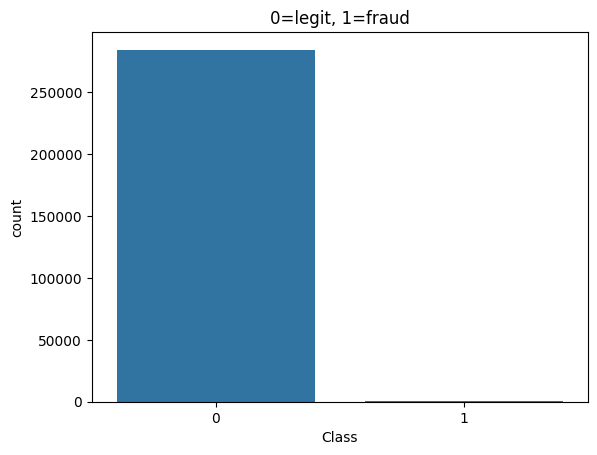

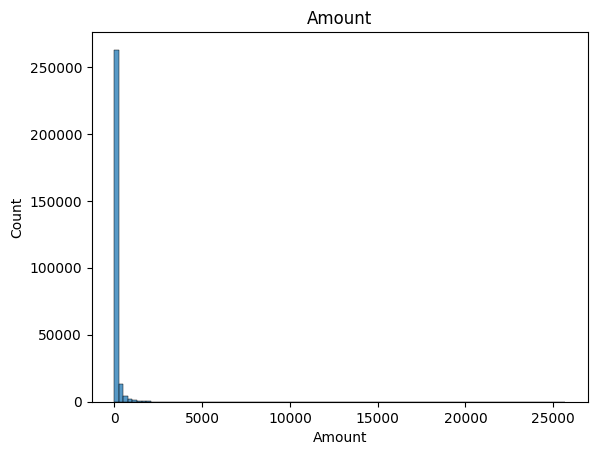

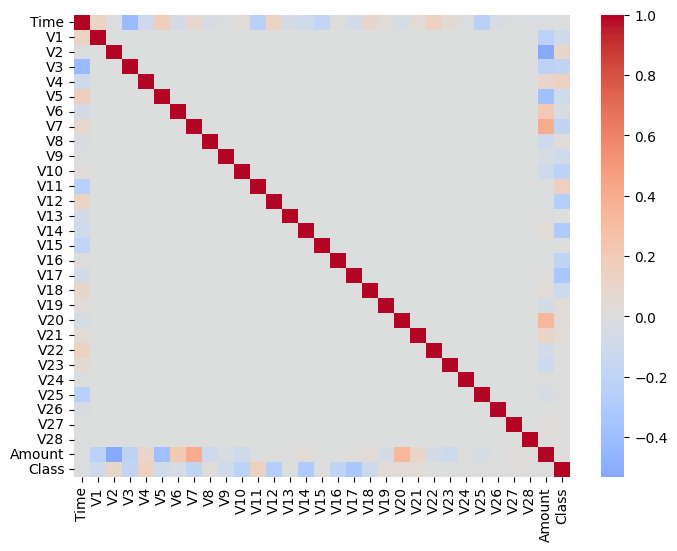

In [ ]:
import matplotlib.pyplot as plt, seaborn as sns
print(df.info())
print(df.describe().T)

# class imbalance
sns.countplot(x='Class', data=df); plt.title('0=legit, 1=fraud'); plt.show()

# Amount distribution
sns.histplot(df['Amount'], bins=100); plt.title('Amount'); plt.show()

# correlations (if desired)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm', center=0); plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print(X_res.shape, y_res.sum())


(454902, 30) 227451


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)   # can use X_res,y_res if resampled
proba_lr = lr.predict_proba(X_test)[:,1]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report, average_precision_score, roc_auc_score, confusion_matrix

# example for lr
pred_lr = (proba_lr >= 0.5).astype(int)
print(classification_report(y_test, pred_lr))
print('PR AUC:', average_precision_score(y_test, proba_lr))
print('ROC AUC:', roc_auc_score(y_test, proba_lr))
print(confusion_matrix(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

PR AUC: 0.7301593237794816
ROC AUC: 0.9727243053242681
[[55177  1687]
 [    8    90]]


In [ ]:
import numpy as np
threshs = np.linspace(0,1,101)
best = []
from sklearn.metrics import precision_score, recall_score
for t in threshs:
    p = (proba_lr >= t).astype(int)
    best.append((t, precision_score(y_test,p, zero_division=0), recall_score(y_test,p)))
# inspect best by recall or a precision constraint

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb, X_res, y_res, scoring='average_precision', cv=skf, n_jobs=-1)
print('CV PR AUC mean:', scores.mean())


CV PR AUC mean: 0.9999879825636219


In [ ]:
import os

# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

In [ ]:
# compact_train.py (very compact)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score
import joblib

df = pd.read_csv('creditcard.csv')
X = df.drop(columns=['Class']); y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
scaler = StandardScaler(); X_train[['Amount','Time']] = scaler.fit_transform(X_train[['Amount','Time']]); X_test[['Amount','Time']] = scaler.transform(X_test[['Amount','Time']])
sm = SMOTE(random_state=42); X_res,y_res = sm.fit_resample(X_train,y_train)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
xgb.fit(X_res,y_res)
proba = xgb.predict_proba(X_test)[:,1]
print('PR AUC:', average_precision_score(y_test, proba), 'ROC AUC:', roc_auc_score(y_test, proba))
joblib.dump(xgb, 'models/xgb_fraud_joblib.pkl'); joblib.dump(scaler, 'models/scaler_fraud_joblib.pkl')

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:12:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


PR AUC: 0.8774250035438478 ROC AUC: 0.9791587410850666


['models/scaler_fraud_joblib.pkl']